# 2.5 Data Analysis
##  Example 2, Part 5: pH-Rate Profile Example - Kirby 2002

Tony Kirby is one of the giants of physical organic and bio-organic chemistry. In this paper he follows up on a decades-long series of papers investigating the mechanism of *amylases* that catalyze the hydrolysis of acetal groups in polysaccharide chains.

``Concerted general acid and nucleophilic catalysis of acetalhydrolysis. A simple model for the lysozyme mechanism''. K.E.S. Deana, A.J. Kirby, *J. Chem. Soc., Perkin Trans. 2*, **2002**, 428-432. https://doi.org/10.1039/B110948K. 

This *Python* notebook will curve fit the equation for absorbance vs time against kinetic data. We have a set of absorbance measured over 13 hours for 19 reaction performed at various pH values. We want to plot the pH rate profile ($\log{k_{obs}}$ vs pH). First we must determine the rate constant. In this case there are **two rate constants** for two different reactions that produce product.

## The equations

For our reaction system...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

...we state the following differential equations that describe the rate laws...

$$
\begin{align*}
\dfrac{d\left[A\right]_t}{dt} &= -k_1 \left[A\right]_t \\
\dfrac{d\left[I\right]_t}{dt} &= k_1 \left[A\right]_t - k_2 \left[I\right]_t \\
\dfrac{d\left[P\right]_t}{dt} &= k_1 \left[A\right]_t + k_2 \left[I\right]_t
\end{align*}
$$

From this we derived the integrated rate laws and created equations that describe the concentration of each species w.r.t. time.

$$
\begin{align*}

\left[A\right]_t &= \left[A\right]_0 e^{-kt} \\
\left[I \right]_t &= \left[A\right]_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right) \\
\left[ P\right]_{t} &= \left[A\right]_{0} \left(- \frac{k_{1} \left(e^{- k_{2} t} - e^{- k_{1} t}\right)}{k_{1} - k_{2}} + 2 - 2 e^{- k_{1} t}\right) \\

\end{align*}
$$

And we can obtain the absorbance contribution from each species using the initial absorbance ($Abs_0$) and the molar extinction coefficients for each species ($\epsilon_A$, $\epsilon_I$, and $\epsilon_P$)

$$\text{Abs}_t = \text{Abs}_0 \left\{ e^{-k_1 t}
             + \frac{\epsilon_I}{\epsilon_A} \frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t} \right)
             + \frac{\epsilon_P}{\epsilon_A} \left[ 2 - 2 e^{-k_1 t} - \frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t}\right) \right] \right\}$$

This is the model to which we will fit the data. Beware! The equation reported in the paper contains typographical errors. The above equation is correct.

## The Data

The data is collected in a single csv file. We can open that file with a text editor, observe its format, and then write python code to import the data into a *Pandas* dataframe. The code below will import the data and display the dataframe. 

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/Kirby2002/Abs_t_pH_ALL.csv",
                skipinitialspace=True,
                comment="#"
                )

display(df.head())

time_column = df.columns[0]    # get the column label for the first column (time)
pH_values = df.columns[1:]     # get the column labels that are the pH values


,time (hr),0.00,0.28,0.55,1.00,1.25,1.50,1.90,2.25,2.60,3.40,3.70,4.10,4.40,4.75,5.10,5.60,6.00,6.50,6.90
0,0.00,0.100,0.100,0.102,0.100,0.100,0.100,0.099,0.100,0.099,0.098,0.099,0.100,0.098,0.099,0.100,0.097,0.100,0.100,0.100
1,0.25,0.308,0.207,0.151,0.129,0.116,0.114,0.116,0.118,0.127,0.170,0.203,0.233,0.237,0.217,0.177,0.138,0.120,0.106,0.103
2,0.50,0.435,0.293,0.198,0.159,0.131,0.130,0.130,0.136,0.154,0.220,0.264,0.296,0.302,0.283,0.233,0.171,0.138,0.112,0.104
3,0.75,0.502,0.360,0.241,0.184,0.148,0.144,0.144,0.153,0.178,0.255,0.303,0.331,0.335,0.319,0.270,0.200,0.154,0.118,0.110
4,1.00,0.547,0.413,0.277,0.210,0.159,0.158,0.156,0.168,0.197,0.285,0.328,0.347,0.350,0.339,0.299,0.225,0.170,0.125,0.111


'time (hr)'

## Plots the Data


Always do a quick visual check of your data. Perhaps its all noise? the code below will plot all the abs vs time traces in a single plot.



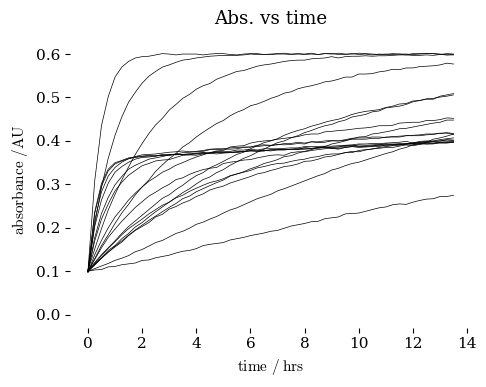

In [18]:
import matplotlib.pyplot as plt

plt.rcdefaults()                              ### resets the plot to defaults 
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

x = df[time_column]

for pH in pH_values:

    y = df[pH]             # get absorbance values at a given pH
    
    ax.plot(x, y,          # draw a plot
            marker = None,
            markersize = 3, markeredgewidth = 0.5, 
            markerfacecolor = "white", markeredgecolor = "black",
            linestyle = '-',            ### use a line between points
            linewidth='0.5',            ### make the line thin
            color = 'black',            ### the line is black
            zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
            )
    
ax.set(ylabel=r"$\rm absorbance\ /AU$", 
        xlabel=r"$\rm time\ /\; hrs$",
        title = "Abs. vs time",
        xlim=[None, None],      
        ylim=[-0.03, 0.65])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig("./data/Kirby2002/Plot_Abs_t_pH_"+"ALL"+".pdf")    # use this to save the figure in PDF format
plt.show()

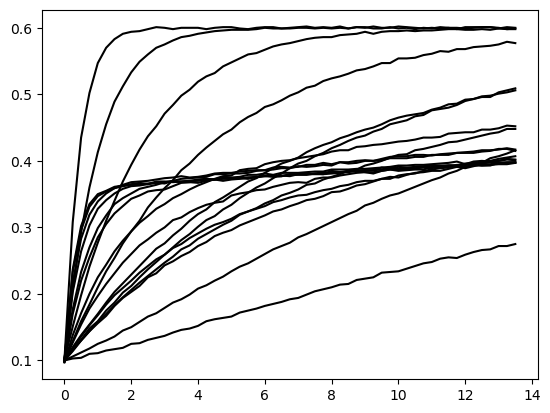

In [22]:
### MINIMAL CODE
# 
import matplotlib.pyplot as plt
plt.rcdefaults()                              ### resets the plot to defaults 

x = df[time_column]

for pH in pH_values:
    y = df[pH]             # get absorbance values at a given pH
    plt.plot(x, y, "k-")

plt.show()

## Curve Fit to 1st Order 

The reaction could be considered to be a simple first order reaction that produces two products. This would be the case if $k_2 \gg k_1$

So for The case...

$$\text{A} \overset{k_{obs}}{\longrightarrow} 2 \text{P}$$

The absorbance change will be the addition of $Abs_A$ and $Abs_P$ and is derived as...

$$\text{Abs}_t = \text{Abs}_0 \left\{ e^{-k_1 t}
             +2 \frac{\epsilon_P}{\epsilon_A} \left[ 1 -  e^{-k_1 t}  \right] \right\}$$

...which is the same as eq. 2 in the paper. Let us fit a set of experimental data to this equation. Consider the code below.

We can curve fit using the derived equation objects from sympy; we can curve fit using the numeric integration function; and we can curve fit a function that we create according to the know equation. this latter method is the simplest to code so that is what we will use.

It can be a problem to fit many variable. If there are variables that are strongly correlated we can end up with a situation where many very different solutions can give a satisfactory fit. We can also have systems that will not minimize as there is too large of a numerical space to explore in search of the minimum.

From previous work (one must go to a PhD thesis at Cambridge to get this data) we know that $\epsilon_P/\epsilon_A = 3.0$ and we have deesigned the experiment in such a way that the initial concentrations of the reactant gives a value for $Abs_0 = 0.100 $ AU. Now we only have to solve for $k_{obs}$

pH is 0.00
parameter names: ['k1']
independent variables: ['t']
[[Model]]
    Model(fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 55
    # variables        = 1
    chi-square         = 9.2653e-05
    reduced chi-square = 1.7158e-06
    Akaike info crit   = -729.169198
    Bayesian info crit = -727.161864
    R-squared          = 0.99973608
[[Variables]]
    k1:  6.1113e-04 +/- 2.3814e-06 (0.39%) (init = 0.002)


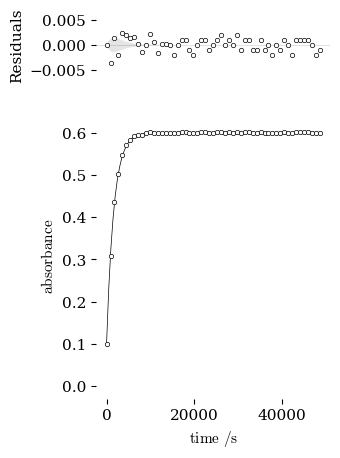

In [101]:
import matplotlib.pyplot as plt
import lmfit     
import uncertainties as un               # tool set for handling uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy 
from scipy.optimize import curve_fit

pH = pH_values[0]     # choose one of the pH columns
#print(len(pH_values))

def fit_u(t, k1):

    eA = 1; Abs_0 = 0.1; eP = 3
    Total_Abs = Abs_0 / eA * (unp.exp(-k1 * t) + 2 * eP * (1 - unp.exp(-k1 * t)))

    return(Total_Abs)      
    
def fit(t, k1):

    eA = 1; Abs_0 = 0.1; eP = 3
    Total_Abs = Abs_0 / eA * (np.exp(-k1 * t) + 2 * eP * (1 - np.exp(-k1 * t)))

    return(Total_Abs)      

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

x = df[time_column] * 3600      # time in seconds
y = df[pH]

print(f"pH is {pH}")

##########################
### use lmfit to fit data to function 
##########################

mod = lmfit.Model(fit, nan_policy = 'omit')                  # load the function f as the model to be fit

print(f'parameter names: {mod.param_names}')
print(f'independent variables: {mod.independent_vars}')

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k1 = dict(value = 0.002, min = 1E-15))    # initial values are also set here
                                    
result = mod.fit(y, pars, t=x)            # use the .fit method on the model object to perform the curve fit
                                            # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

k1_fit = result.uvars['k1']

x1 = np.linspace(0, np.max(x), 100)
bestfit_y1 = fit_u(x1, k1_fit)



#######################################################################################

###############################################################################
######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[4,5], height_ratios=[1, 4])  

# Settings for plot
ax[1].set(
#          teitle = Title,       
          ylabel=r"$\rm absorbance$ ", 
          xlabel=r"$\rm time\ /s$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-0.03,0.65]
       )

### White background graphics
#ax[1].scatter(x, y, marker = "o", s = 40, color = "white", zorder = 2)
### Data graphics
ax[1].scatter(x, y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 

# Plot the curve fit line
ax[1].plot(x1,unp.nominal_values(bestfit_y1), 
           marker = None, color = "black", 
           linewidth=0.5, zorder = 0)


######################
#### Create Confidence band upper and lower bounds
######################
sigma = 2

# upper and lower bounds of uncertain kobs as float values
fit_up = unp.nominal_values(bestfit_y1) + unp.std_devs(bestfit_y1) * sigma
fit_dn = unp.nominal_values(bestfit_y1) - unp.std_devs(bestfit_y1) * sigma

# make filled band
ax[1].fill_between(x1, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")

# Add error bars
### White background graphics
#ax[1].errorbar(x, y, yerr=None, xerr=None, fmt="None", 
#               ecolor="white", elinewidth=1.5, dash_capstyle="round",
#               zorder=1)
### Data graphics
#ax[1].errorbar(x, y, yerr=None, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, 
#             #  capsize=2, capthick=0.5, 
#               zorder=3)

#ax[1].set_xticks([0.0032,0.0033,0.0034])


######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = y - fit(x, k1_fit.n)      

ax[0].set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-np.max(residuals)*3,np.max(residuals)*3]
       )
### White background Graphics
#ax[0].scatter(x, residuals, marker = "o", s = 40, color = "white", zorder = 1)
#ax[0].errorbar(x, residuals, yerr=None, xerr=None, fmt="None", 
#               ecolor="white", elinewidth=3, zorder=1)
### Data graphics
ax[0].scatter(x, residuals, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3)
#ax[0].errorbar(x, residuals, yerr=None, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, dash_capstyle="projecting",
#             #  capsize=2, capthick=0.5, 
#               zorder=2)

# make filled band
ax[0].fill_between(x1, unp.std_devs(bestfit_y1) * sigma, -unp.std_devs(bestfit_y1) * sigma, 
                   facecolor="black", alpha=0.1, zorder = 1,
                   linewidth = 0, label="confidence interval")

### Other elements
ax[0].axhline(0, color='lightgray', linewidth=0.5, zorder = 0) 
ax[0].set_xticks([])


### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("3B-10.pdf")
plt.show()


## Curve Fitting the Model

The code below is almost identical to that above. I changed the functions that represnet the model and changed a few other places that used those functions (we have more parameters now). Otherwise its the same: state model, fit model, plot.

pH is 4.40
[[Model]]
    Model(f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 55
    # variables        = 2
    chi-square         = 6.7129e-05
    reduced chi-square = 1.2666e-06
    Akaike info crit   = -744.892111
    Bayesian info crit = -740.877444
    R-squared          = 0.99940896
[[Variables]]
    k1:  8.2932e-04 +/- 6.2054e-06 (0.75%) (init = 0.0002)
    k2:  4.0876e-06 +/- 2.6983e-08 (0.66%) (init = 1e-05)
log(k1) = -3.0813+/-0.0032
log(k2) = -5.3885+/-0.0029


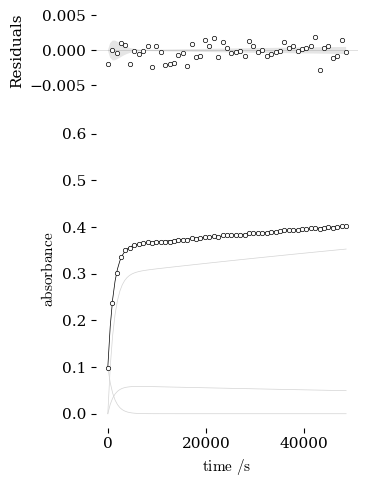

In [110]:
import matplotlib.pyplot as plt
import lmfit     
import uncertainties as un               # tool set for handling uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy 
from scipy.optimize import curve_fit

pH = pH_values[12]     # choose one of the pH columns

#print(len(pH_values))

def f_u(t, k1, k2):

    Abs_0 = 0.1
    eA = 1
    eI = 0.6
    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * unp.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t))
    Pt = A0 * ((2 - 2 * unp.exp(-k1 * t)) - k1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t)))
    Total_Abs = At*eA + eI * It + eP * Pt     

    return(Total_Abs)      
    
def f(t, k1, k2):

    Abs_0 = 0.1
    eA = 1
    eI = 0.6
    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * np.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t))
    Pt = A0 * ((2 - 2 * np.exp(-k1 * t)) - k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t)))
    Total_Abs = At*eA + eI*It + eP*Pt     

    return(Total_Abs)      

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

x = df[time_column] * 3600      # time in seconds
y = df[pH]

print(f"pH is {pH}")

##########################
### use lmfit to fit data to function 
##########################

mod = lmfit.Model(f, nan_policy = 'omit')  # load the function f as the model to be fit

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k1 = dict(value = 0.0002, min = 1E-15),
                       k2 = dict(value = 0.00001, min = 1E-15))    # initial values are also set here
                                    
result = mod.fit(y, pars, t=x)  # Use the .fit method on the model object to perform the curve fit
                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

k1_fit = result.uvars['k1']
k2_fit = result.uvars['k2']

print(f"log(k1) = {unp.log10(k1_fit)}")
print(f"log(k2) = {unp.log10(k2_fit)}")

x1 = np.linspace(0, np.max(x), 100)
bestfit_y1 = f_u(x1, k1_fit, k2_fit)



#######################################################################################

###############################################################################
######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[4,5], height_ratios=[1, 4])  

# Settings for plot
ax[1].set(
#          teitle = Title,       
          ylabel=r"$\rm absorbance$ ", 
          xlabel=r"$\rm time\ /s$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-0.03,0.65]
       )

### White background graphics
#ax[1].scatter(x, y, marker = "o", s = 40, color = "white", zorder = 2)
### Data graphics
ax[1].scatter(x, y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 

# Plot the curve fit line
ax[1].plot(x1,unp.nominal_values(bestfit_y1), 
           marker = None, color = "black", 
           linewidth=0.5, zorder = 0)


######################
#### Create Confidence band upper and lower bounds
######################
sigma = 2

# upper and lower bounds of uncertain kobs as float values
fit_up = unp.nominal_values(bestfit_y1) + unp.std_devs(bestfit_y1) * sigma
fit_dn = unp.nominal_values(bestfit_y1) - unp.std_devs(bestfit_y1) * sigma

# make filled band
ax[1].fill_between(x1, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")

# Add error bars
### White background graphics
#ax[1].errorbar(x, y, yerr=None, xerr=None, fmt="None", 
#               ecolor="white", elinewidth=1.5, dash_capstyle="round",
#               zorder=1)
### Data graphics
#ax[1].errorbar(x, y, yerr=None, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, 
#             #  capsize=2, capthick=0.5, 
#               zorder=3)

#ax[1].set_xticks([0.0032,0.0033,0.0034])


######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = y - f(x, k1_fit.n, k2_fit.n)      

ax[0].set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-np.max(residuals)*3,np.max(residuals)*3]
       )
### White background Graphics
#ax[0].scatter(x, residuals, marker = "o", s = 40, color = "white", zorder = 1)
#ax[0].errorbar(x, residuals, yerr=None, xerr=None, fmt="None", 
#               ecolor="white", elinewidth=3, zorder=1)
### Data graphics
ax[0].scatter(x, residuals, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3)
#ax[0].errorbar(x, residuals, yerr=None, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, dash_capstyle="projecting",
#             #  capsize=2, capthick=0.5, 
#               zorder=2)

# make filled band
ax[0].fill_between(x1, unp.std_devs(bestfit_y1) * sigma, -unp.std_devs(bestfit_y1) * sigma, 
                   facecolor="black", alpha=0.1, zorder = 1,
                   linewidth = 0, label="confidence interval")

ax[0].axhline(0, color='lightgray', linewidth=0.5, zorder = 0) 
ax[0].set_xticks([])

######################
### Other elements - add components
######################

def components(t, k1, k2):

    Abs_0 = 0.1
    eA = 1
    eI = 0.6
    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * np.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t))
    Pt = A0 * ((2 - 2 * np.exp(-k1 * t)) - k1/(k1-k2) * (np.exp(-k2*t)-unp.exp(-k1*t)))
    Abs_A = At * eA 
    Abs_I = eI * It    
    Abs_P = eP * Pt  

    return(Abs_A, Abs_I, Abs_P)   

[Abs_A, Abs_I, Abs_P] = components(x1, k1_fit.n, k2_fit.n)
# Plot the calculated contributions from each component

ax[1].plot(x1,Abs_A, 
           marker = None, color = "lightgrey", 
           linewidth=0.5, zorder = 0)
ax[1].plot(x1,Abs_I, 
           marker = None, color = "lightgrey", 
           linewidth=0.5, zorder = 0)
ax[1].plot(x1,Abs_P, 
           marker = None, color = "lightgrey", 
           linewidth=0.5, zorder = 0)



### Output plot
#plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("3B-10.pdf")
plt.show()


## The Wrong Equation

The equation 3 in the paper has two typographical errors. If we were to use it for a curve fit we get nonense results. Consider the code below that uses the incorrect equation as is.

pH is 5.60
parameter names: ['k1', 'k2']
independent variables: ['t']
[[Model]]
    Model(fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 55
    # variables        = 2
    chi-square         = 0.12748360
    reduced chi-square = 0.00240535
    Akaike info crit   = -329.690539
    Bayesian info crit = -325.675872
    R-squared          = 0.66137154
[[Variables]]
    k1:  0.68494988 +/- 0.02774572 (4.05%) (init = 0.002)
    k2:  2.3810e-05 +/- 2.3087e-06 (9.70%) (init = 0.0002)
[[Correlations]] (unreported correlations are < 0.100)
    C(k1, k2) = -0.7929
log(k1) = -0.164+/-0.018
log(k2) = -4.62+/-0.04


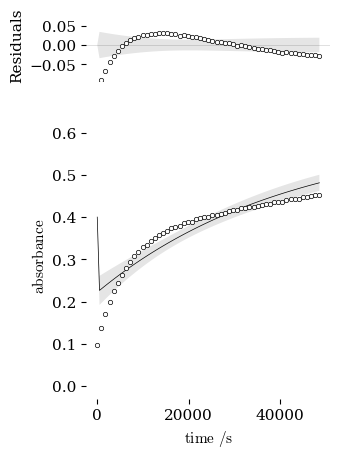

In [93]:
import matplotlib.pyplot as plt
import lmfit     
import uncertainties as un               # tool set for handling uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy 
from scipy.optimize import curve_fit

pH = pH_values[15]     # choose one of the pH columns
#print(len(pH_values))

def fit_u(t, k1, k2):  # wrong equation

    Abs_0 = 0.1
    eA = 1
    eI = 0.6
    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * unp.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t))
    Pt = A0 * ((2 - 1 * unp.exp(-k1 * t)) - 1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t)))
    Total_Abs = At*eA + eI * It + eP * Pt     

    return(Total_Abs)      
    
def fit(t, k1, k2):

    Abs_0 = 0.1
    eA = 1
    eI = 0.6
    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * np.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t))
    Pt = A0 * ((2 - 1 * np.exp(-k1 * t)) - 1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t)))
    Total_Abs = At*eA + eI*It + eP*Pt     

    return(Total_Abs)      

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

x = df[time_column] * 3600      # time in seconds
y = df[pH]
print(f"pH is {pH}")

##########################
### use lmfit to fit data to function 
##########################

mod = lmfit.Model(fit, nan_policy = 'omit')                  # load the function f as the model to be fit

print(f'parameter names: {mod.param_names}')
print(f'independent variables: {mod.independent_vars}')

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k1 = dict(value = 0.002, min = 1E-15),
                       k2 = dict(value = 0.0002, min = 1E-15))    # initial values are also set here
                                    
result = mod.fit(y, pars, t=x)          # use the .fit method on the model object to perform the curve fit
                                        # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

k1_fit = result.uvars['k1']
k2_fit = result.uvars['k2']

print(f"log(k1) = {unp.log10(k1_fit)}")
print(f"log(k2) = {unp.log10(k2_fit)}")

x1 = np.linspace(0, np.max(x), 100)
bestfit_y1 = fit_u(x1, k1_fit, k2_fit)



#######################################################################################

###############################################################################
######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[4,5], height_ratios=[1, 4])  

# Settings for plot
ax[1].set(
#          teitle = Title,       
          ylabel=r"$\rm absorbance$ ", 
          xlabel=r"$\rm time\ /s$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-0.03,0.65]
       )

### White background graphics
#ax[1].scatter(x, y, marker = "o", s = 40, color = "white", zorder = 2)
### Data graphics
ax[1].scatter(x, y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 

# Plot the curve fit line
ax[1].plot(x1,unp.nominal_values(bestfit_y1), 
           marker = None, color = "black", 
           linewidth=0.5, zorder = 0)


######################
#### Create Confidence band upper and lower bounds
######################
sigma = 2

# upper and lower bounds of uncertain kobs as float values
fit_up = unp.nominal_values(bestfit_y1) + unp.std_devs(bestfit_y1) * sigma
fit_dn = unp.nominal_values(bestfit_y1) - unp.std_devs(bestfit_y1) * sigma

# make filled band
ax[1].fill_between(x1, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")

# Add error bars
### White background graphics
#ax[1].errorbar(x, y, yerr=None, xerr=None, fmt="None", 
#               ecolor="white", elinewidth=1.5, dash_capstyle="round",
#               zorder=1)
### Data graphics
#ax[1].errorbar(x, y, yerr=None, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, 
#             #  capsize=2, capthick=0.5, 
#               zorder=3)

#ax[1].set_xticks([0.0032,0.0033,0.0034])


######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = y - fit(x, k1_fit.n, k2_fit.n)      

ax[0].set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-np.max(residuals)*3,np.max(residuals)*3]
       )
### White background Graphics
#ax[0].scatter(x, residuals, marker = "o", s = 40, color = "white", zorder = 1)
#ax[0].errorbar(x, residuals, yerr=None, xerr=None, fmt="None", 
#               ecolor="white", elinewidth=3, zorder=1)
### Data graphics
ax[0].scatter(x, residuals, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3)
#ax[0].errorbar(x, residuals, yerr=None, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, dash_capstyle="projecting",
#             #  capsize=2, capthick=0.5, 
#               zorder=2)

# make filled band
ax[0].fill_between(x1, unp.std_devs(bestfit_y1) * sigma, -unp.std_devs(bestfit_y1) * sigma, 
                   facecolor="black", alpha=0.1, zorder = 1,
                   linewidth = 0, label="confidence interval")

### Other elements
ax[0].axhline(0, color='lightgray', linewidth=0.5, zorder = 0) 
ax[0].set_xticks([])


### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("3B-10.pdf")
plt.show()
